In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%load_ext autoreload
%autoreload 2

# Load the data

In [3]:
def load_data(file_path: str):
    df = pd.read_csv(file_path, index_col='date', parse_dates=True)
    return df

directory_path = 'DATA/VEX_MAGNETO'
file_name = 'VEX-V-Y-MAG-4.csv'

df = load_data(os.path.join(directory_path, file_name))
df.head()

,BX,BY,BZ,BT,XSC,YSC,ZSC,RSC
date,,,,,,,,
2006-04-24 00:00:00,12.357658,-1.304164,-3.332425,12.881274,-4451.055178,-3196.485753,-65466.762260,65695.760575
2006-04-24 00:05:00,12.868947,-0.980800,-3.360027,13.340680,-4202.246280,-3138.377907,-65806.350827,66015.078600
2006-04-24 00:10:00,12.857438,-0.871986,-3.487877,13.355384,-3954.000329,-3080.233288,-66137.913808,66327.612616
2006-04-24 00:15:00,12.898635,-0.684986,-2.885689,13.248405,-3705.057257,-3021.761270,-66463.291041,66635.079608
2006-04-24 00:20:00,12.766473,-0.517608,-2.217135,12.972905,-3453.676541,-2962.553108,-66784.717784,66939.596338


# Plot the data

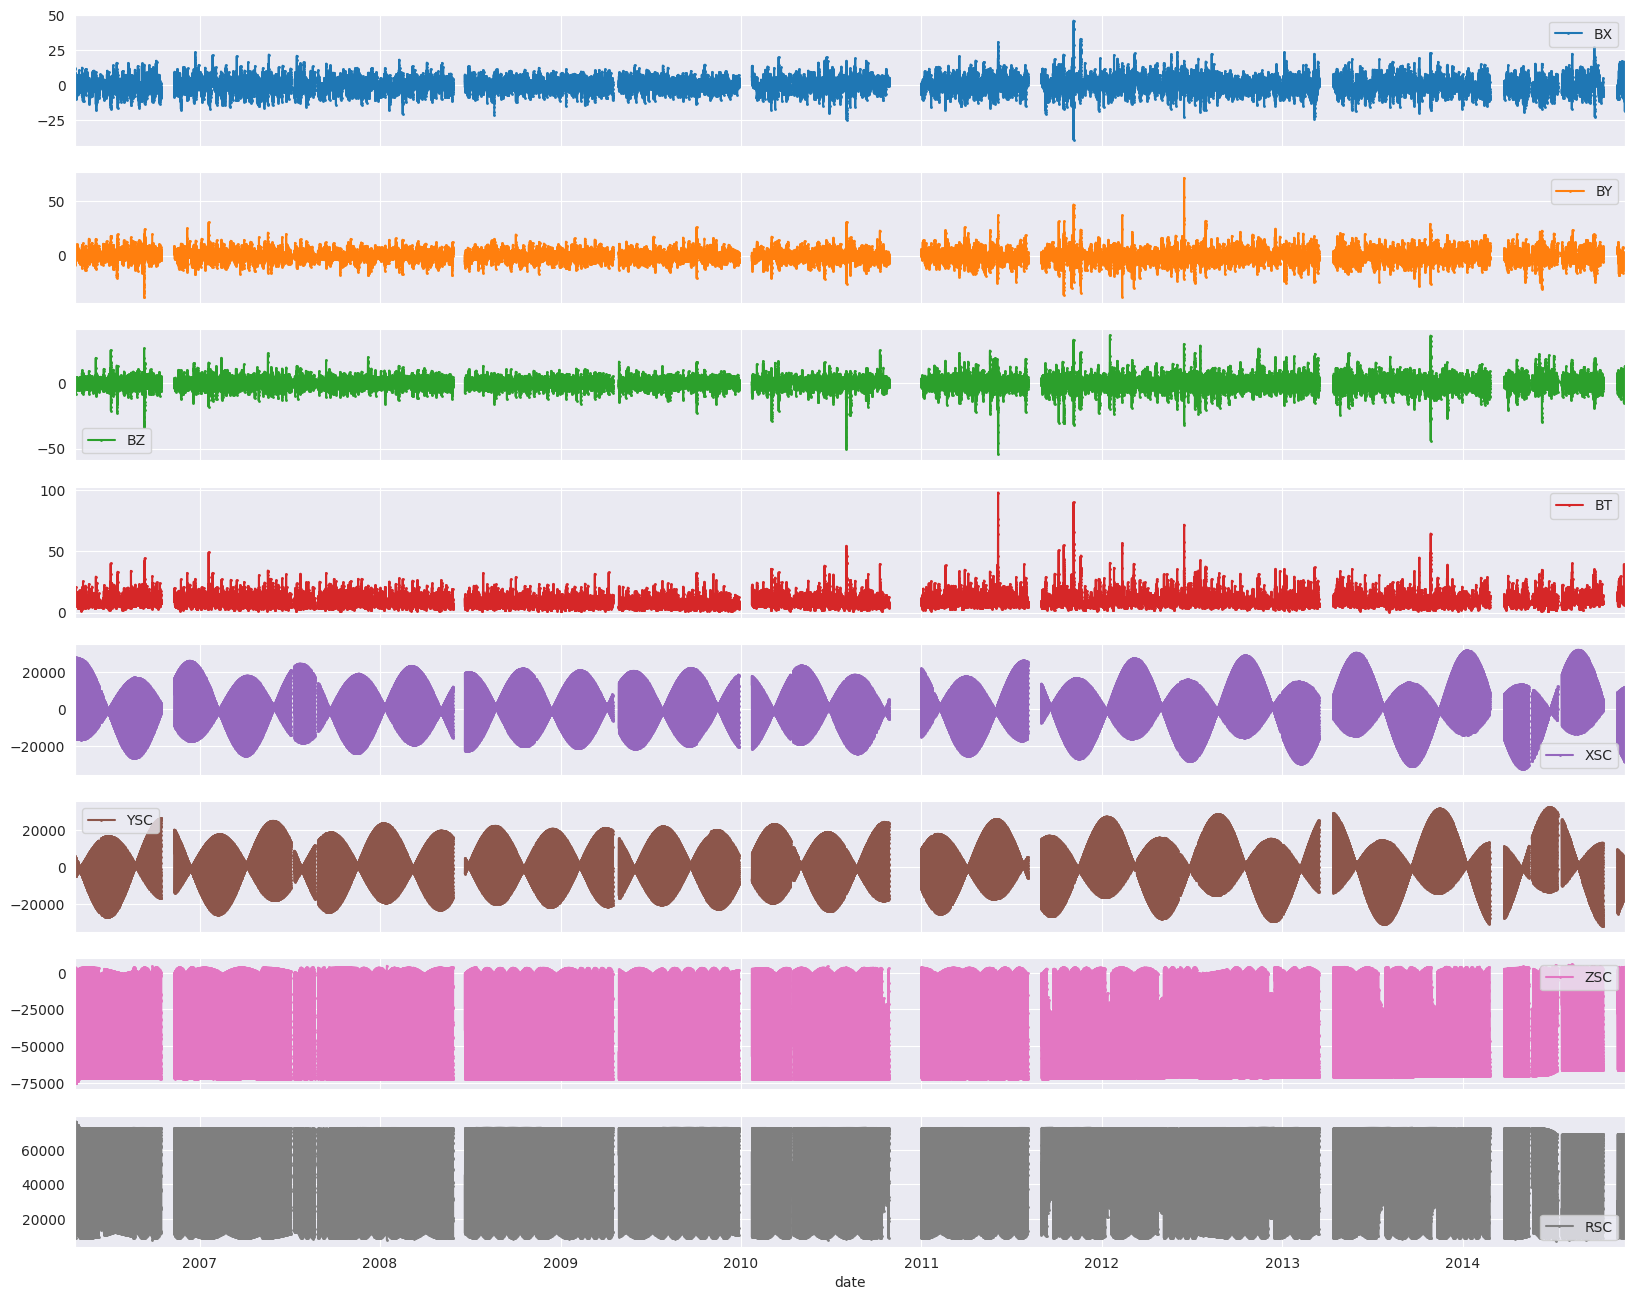

In [4]:
df_hourly = df.resample('h').mean()
df_hourly.plot(figsize=(20, 16), marker='o', markersize=1, subplots=True)
plt.show()

# Plot total magnetic field

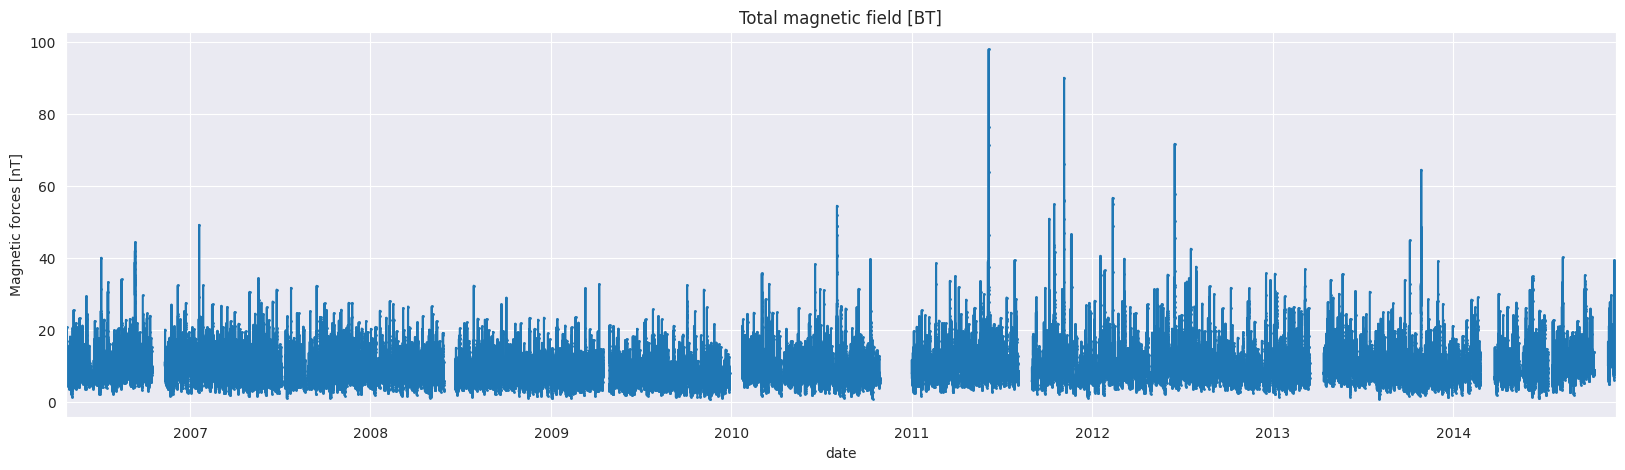

In [5]:
df_hourly['BT'].plot(figsize=(20, 5), marker='o', markersize=1, ylabel='Magnetic forces [nT]', title='Total magnetic field [BT]')
plt.show()

# Plot X-Y coordinates in solar coordinates

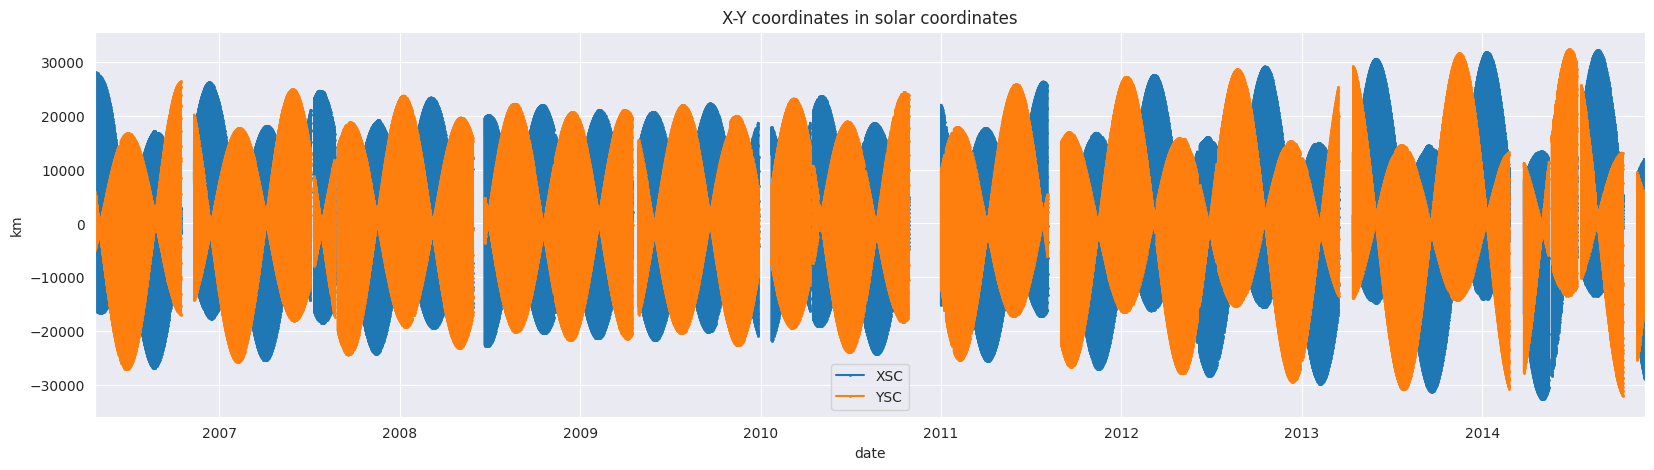

In [6]:
df_hourly[df_hourly.columns[4:6]].plot(figsize=(20, 5), marker='o', markersize=1, title= "X-Y coordinates in solar coordinates", ylabel="km")
plt.show()

# Plot the distance from the Sun

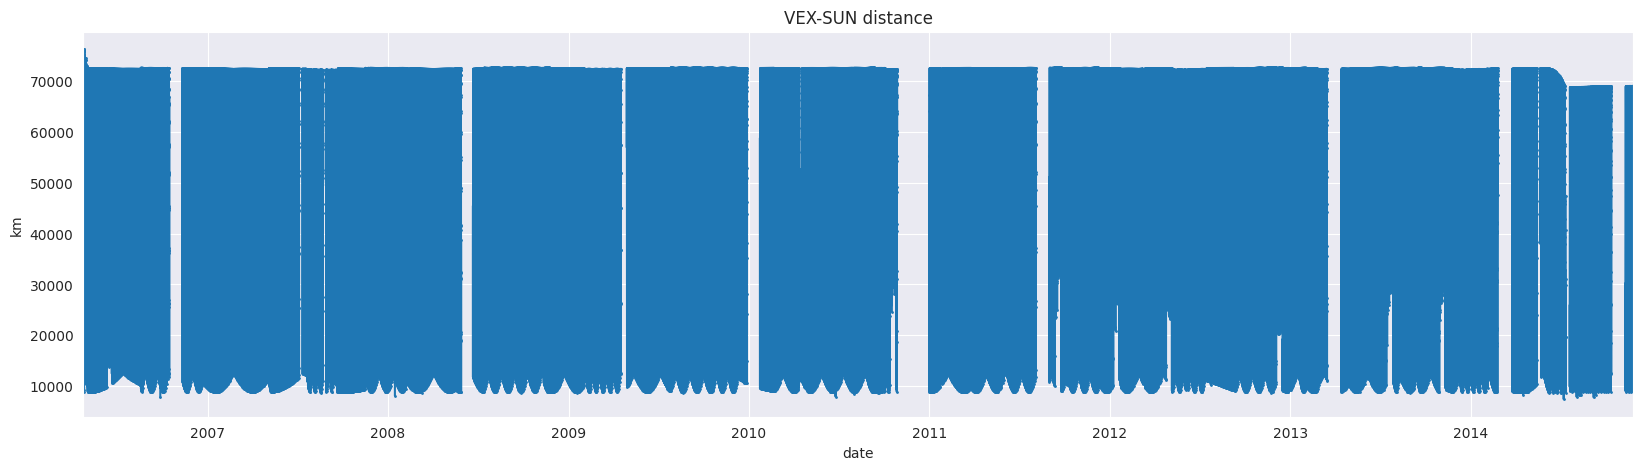

In [7]:
df_hourly['RSC'].plot(figsize=(20, 5), marker='o', markersize=1, title= "VEX-SUN distance", ylabel="km")
plt.show()

In [8]:
# Filter data that is farther than 10000km from the Sun
print(df.isna().sum() / len(df) * 100)
thresholds = [10000, 11000, 12000] 
 
dfs = [pd.DataFrame() for _ in range(len(thresholds))]  
for i, threshold in enumerate(thresholds):
    dfs[i] = df[df['RSC'] > threshold]
    print(f"Threshold: {threshold}")
    print(f"data percentage: {(dfs[i]['RSC'] > threshold).sum() / len(df) * 100}")

for i, threshold in enumerate(thresholds):
    dfs[i].to_csv(f"DATA/VEX_MAGNETO/VEX-V-Y-MAG-4_{threshold}.csv")
# df[df['RSC'] > 11000].head()
# PLot the magnetic field with the CME events

BX     1.392845
BY     1.392845
BZ     1.392845
BT     1.392845
XSC    1.392845
YSC    1.392845
ZSC    1.392845
RSC    1.392845
dtype: float64
Threshold: 10000
data percentage: 95.82558663668294
Threshold: 11000
data percentage: 95.32101603363304
Threshold: 12000
data percentage: 94.81145091830352


In [9]:
data_path = "DATA/VENUS_EXPRESS/"
csv_file_path = data_path + "VEX_CME_date_time.csv"
vex_boundary_df = pd.read_csv(csv_file_path)
vex_boundary_df['start_time'] = pd.to_datetime(vex_boundary_df['start_time'])
vex_boundary_df['end_time'] = pd.to_datetime(vex_boundary_df['end_time'])
vex_boundary_df.head()

,start_time,end_time
0,2007-02-13 04:48:00.000,2007-02-14 09:33:15.840
1,2007-04-27 00:14:24.000,2007-04-27 16:10:33.600
2,2007-05-06 00:43:12.000,2007-05-06 20:52:48.000
3,2007-05-24 19:12:00.000,2007-05-25 19:59:31.200
4,2007-06-16 02:15:21.600,2007-06-16 17:16:48.000


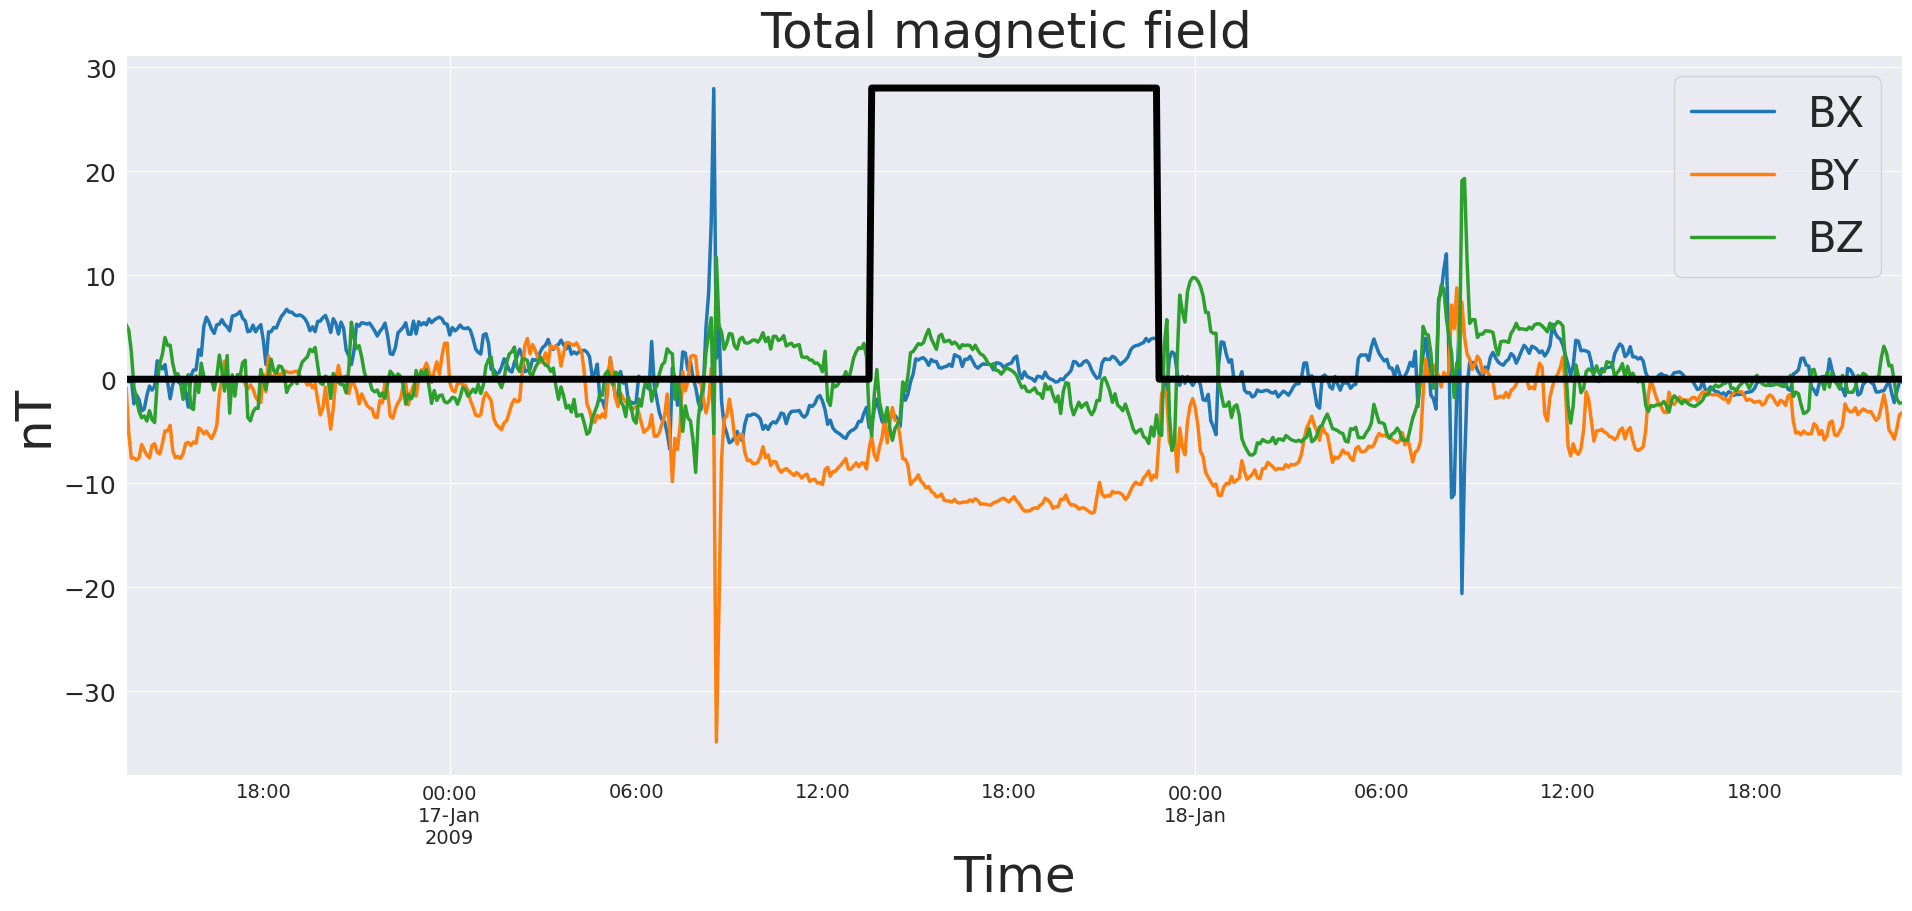

In [16]:
# Add cme column to magneto dataframe
from datetime import datetime, timedelta

# Set the year and day numbers
# year = 2006
# start_day = 253
# end_day = 255
# 
# # Calculate the dates
# start_date = datetime(year, 1, 1) + timedelta(days=start_day - 1)
# end_date = datetime(year, 1, 1) + timedelta(days=end_day - 1)

plt.rcParams.update({
    'font.size': 36,
    'axes.labelsize': 36,
    'axes.titlesize': 36,
    'xtick.labelsize': 14,
    'ytick.labelsize': 18, 
    'legend.fontsize': 30,
    'figure.titlesize': 24,
    'lines.linewidth': 3,
})

def plot_cme(index: int, index2: int = None):
    start_date = vex_boundary_df.iloc[index]['start_time'] - timedelta(hours=24)
    index2 = index if index2 is None else index2
    end_date = vex_boundary_df.iloc[index2]['end_time'] + timedelta(hours=24)
    
    sub_df = df.loc[start_date:end_date].copy()
    mag_cols = ['BX', 'BY', 'BZ']
    
    sub_df.loc[:, 'cme'] = 0
    value = int(max(sub_df[mag_cols].max()) + 0.5)
    for index, row in vex_boundary_df.iterrows():
        sub_df.loc[row['start_time']:row['end_time'], 'cme'] = value
        
    # Plot the magnetic field with the CME events
    fig, ax = plt.subplots(figsize=(20, 10), sharex=True)
    sub_df[['BX', 'BY', 'BZ']].plot(ax=ax, linewidth=2.5, label="BT", ylabel='nT', title='Total magnetic field ')
    sub_df['cme'].plot(ax=ax, color='black', linewidth=5)
    
    # Min max scale the rsc data between 0 and 1
    # sub_df['RSC'] = (sub_df['RSC'] - sub_df['RSC'].min()) / (sub_df['RSC'].max() - sub_df['RSC'].min())
    # sub_df['RSC'] = sub_df['RSC'] * (value + 20) 
    # sub_df['RSC'].plot(marker='o', markersize=1, title= "VEX-SUN distance", ylabel="km", ax=ax[1], color='black')
    # plt.legend(["X", "Y", "Z", "CME"])
    plt.xlabel("Time")    
    plt.tight_layout()
    plt.show()
    
plot_cme(10)